In [699]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PolynomialFeatures
from sklearn.linear_model import Ridge,LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,learning_curve



In [700]:
df = pd.read_csv("csv/df_preparation.csv")

# Division du dataset en features et target

In [701]:
df.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_living_carre', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_above_carre', 'sqft_basement', 'sqft_basement_carre', 'zipcode',
       'sqft_living15', 'sqft_lot15', 'month', 'price'],
      dtype='object')

In [702]:
feature = df.columns[0:-1]
target = 'price'
X =df.drop(["price","month"],axis=1)
y = df[target]

In [703]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_living_carre', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_above_carre', 'sqft_basement', 'sqft_basement_carre', 'zipcode',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [704]:
numerical_features = [
       'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_living_carre', 'sqft_lot','sqft_above',
       'sqft_basement','sqft_living15', 'sqft_lot15'
       ]
categorical_features = [
       
       'floors','waterfront','view', 'condition', 'grade','zipcode'
       ]

In [705]:
my_col_trans = ColumnTransformer([
    ("sclal",StandardScaler(),numerical_features),
    ("pol",PolynomialFeatures(),numerical_features),
    ("one_hot_encoder",OneHotEncoder(handle_unknown = 'ignore'),categorical_features)
])

# Separation en données d'entrainement et de test

In [706]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, train_size = 0.8)

# Modélisation

## Algorithme de régression linéaire Ridge

In [707]:

# modelRid = make_pipeline( my_col_trans,GridSearchCV(Ridge(),param_grid={'alpha': [0,0.01,0.05,0.1,1,10,100,300]},
#                                  scoring='r2',
#                                  refit=True))

# for exp in range(2):
#     affinage = modelRid.fit(X_train,y_train)[1].best_params_["alpha"]
#     liste_param = [param for param in np.linspace(affinage - (affinage/10**(exp+1)),affinage + (affinage/10**(exp+1)),20)]
#     print(liste_param, 'best_alpha',affinage)
#     modelRid = make_pipeline( my_col_trans,GridSearchCV(Ridge(),param_grid={'alpha': liste_param},
#                                  scoring='r2',
#                                  refit=True))

# best_alpha = modelRid.fit(X_train,y_train)[1].best_params_["alpha"]
# best_alpha

In [708]:
modelRid= make_pipeline(my_col_trans, Ridge(alpha=10))
modelRid.fit(X_train,y_train)
modelRid.score(X_train,y_train)

0.8484670958578229

In [709]:
modelRid.score(X_test,y_test)

0.859835092614626

In [710]:
y_pred = modelRid.predict(X_train)

In [711]:
residual = (y_pred - y_train).abs().sort_values()
print(residual)

11103    2.385204e+00
16438    2.967730e+01
3589     3.372451e+01
508      3.409223e+01
13168    3.447417e+01
             ...     
19017    1.535494e+06
1315     1.569418e+06
10446    1.634740e+06
8638     1.659930e+06
21050    2.032910e+06
Name: price, Length: 17290, dtype: float64


/home/steven59/miniconda3/envs/sdp/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


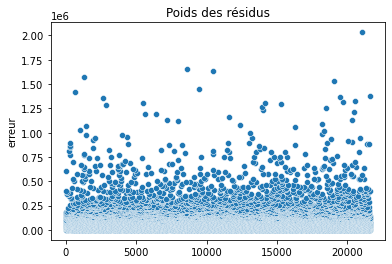

In [712]:
sns.scatterplot(residual.index, residual)
plt.title('Poids des résidus')
plt.ylabel('erreur')
plt.show()

In [713]:
to_drop = residual[residual > 1300000].index

In [714]:
X_train = X_train.drop(to_drop)
y_train = y_train.drop(to_drop)

In [715]:
modeltRid= make_pipeline(my_col_trans, Ridge(alpha=10))
modeltRid.fit(X_train,y_train)
modeltRid.score(X_train,y_train)

0.8546591136295516

In [716]:
modeltRid.score(X_test,y_test)

0.8630792152996226

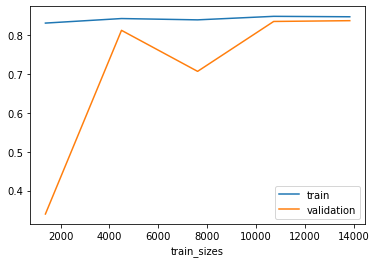

In [717]:

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(modelRid,X_train,y_train,return_times=True)
                                           
                                           
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()
plt.show()

# Export en csv

In [718]:
X_train.to_csv('csv/X_train.csv',index=False)
X_test.to_csv('csv/X_test.csv',index=False)
y_train.to_csv('csv/y_train.csv',index=False)
y_test.to_csv('csv/y_test.csv',index=False) 